In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.randn(200, 1)

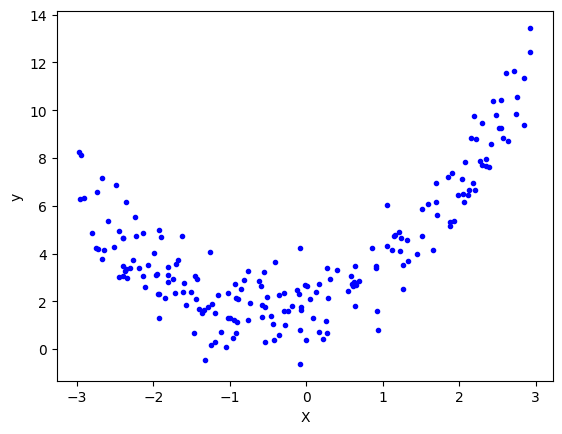

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.1342280291089939

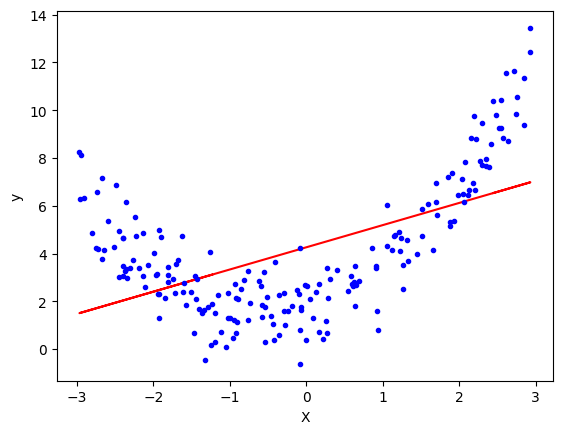

In [9]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
print(X_train[0])
print(X_train_trans[0])

[-1.2311823]
[ 1.         -1.2311823   1.51580986]


In [16]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test_trans)

In [19]:
r2_score(y_test, y_pred)

0.86806281725463

In [20]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90049491 0.83217356]]
[1.82759841]


In [21]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

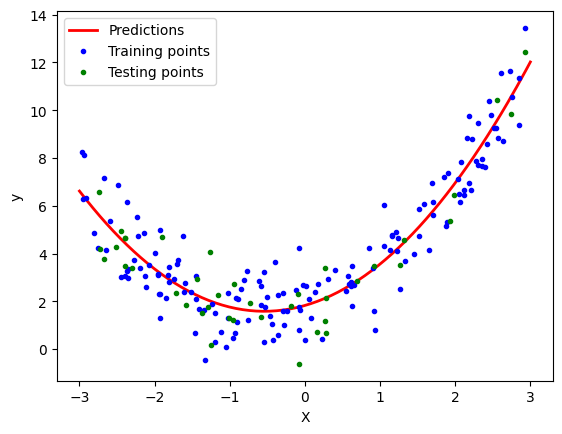

In [25]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [57]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    print("Original data:")
    print("X:", X[0])
    print("Polynomial-transformed data (first row):", X_poly[0])
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_new = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_new, 'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

Original data:
X: [2.07968673]
Polynomial-transformed data (first row): [2.07968673 4.32509689]


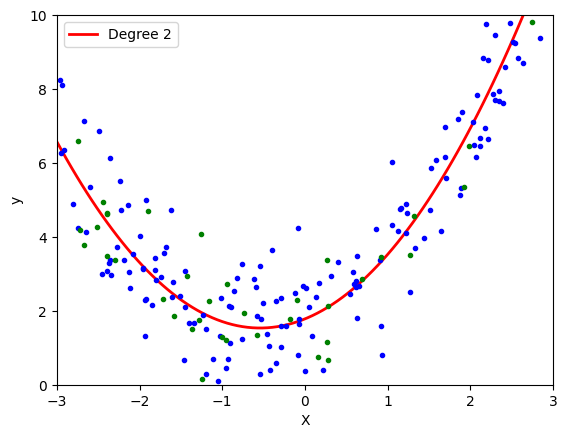

Original data:
X: [2.07968673]
Polynomial-transformed data (first row): [ 2.07968673  4.32509689  8.9948466  18.70646311 38.90358308]


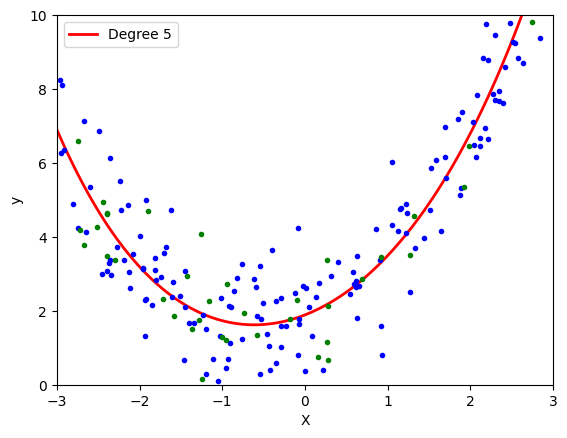

Original data:
X: [2.07968673]
Polynomial-transformed data (first row): [   2.07968673    4.32509689    8.9948466    18.70646311   38.90358308
   80.90726543  168.26176619  349.93176213  727.74844174 1513.48877626]


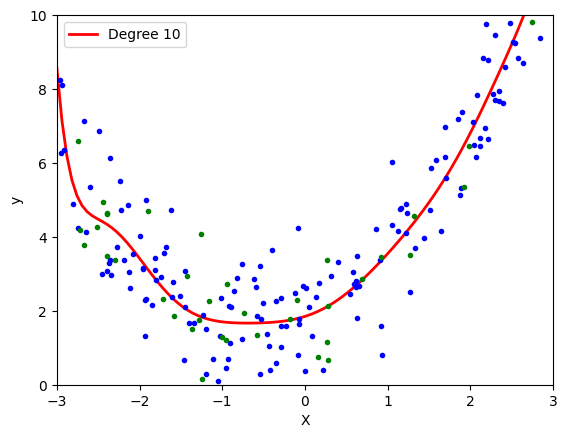

Original data:
X: [2.07968673]
Polynomial-transformed data (first row): [2.07968673e+00 4.32509689e+00 8.99484660e+00 1.87064631e+01
 3.89035831e+01 8.09072654e+01 1.68261766e+02 3.49931762e+02
 7.27748442e+02 1.51348878e+03 3.14758252e+03 6.54598560e+03
 1.36135994e+04 2.83120220e+04 5.88801363e+04]


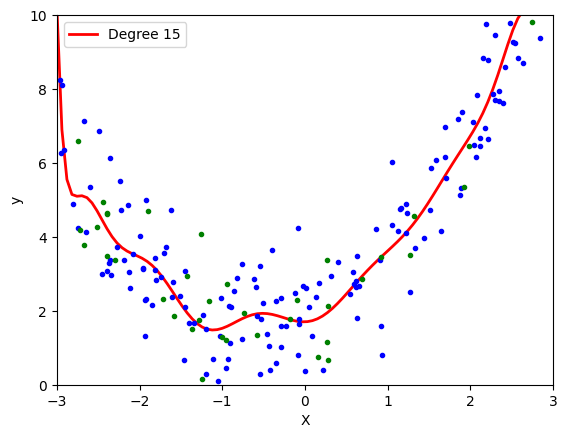

Original data:
X: [2.07968673]
Polynomial-transformed data (first row): [2.07968673e+00 4.32509689e+00 8.99484660e+00 1.87064631e+01
 3.89035831e+01 8.09072654e+01 1.68261766e+02 3.49931762e+02
 7.27748442e+02 1.51348878e+03 3.14758252e+03 6.54598560e+03
 1.36135994e+04 2.83120220e+04 5.88801363e+04 1.22452238e+05
 2.54662295e+05 5.29617794e+05 1.10143910e+06 2.29064828e+06]


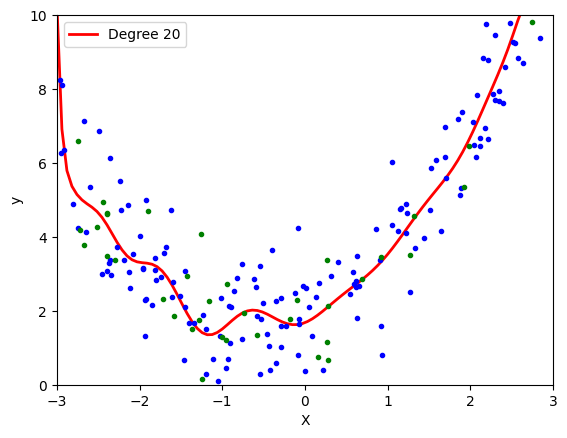

In [58]:
for i in [2, 5, 10, 15, 20]:
    polynomial_regression(i)

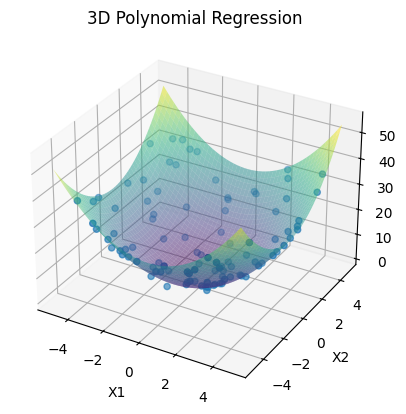

In [73]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
X = np.random.rand(100, 2) * 10 - 5  # Random points in [-5, 5]
y = X[:, 0] ** 2 + X[:, 1] ** 2 + 0.1 * X[:, 0] + 0.1 * X[:, 1] + 0.05 * X[:, 0] * X[:, 1] + 2 + np.random.randn(100)

degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
poly_regression = Pipeline([
    ("poly_features", poly_features),
    ("lin_reg", LinearRegression())
])
poly_regression.fit(X, y)

x1 = np.linspace(-5, 5, 50)
x2 = np.linspace(-5, 5, 50)
X1, X2 = np.meshgrid(x1, x2)
Z = poly_regression.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('3D Polynomial Regression')

plt.show()